In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
print(stop_words)


{'me', "you're", 'hers', 'which', 'shan', "wouldn't", 'for', 'but', 'out', 'himself', 'ain', 'below', 'i', 'no', 'than', 'during', 'from', 'it', 'above', "needn't", 'him', 'itself', 'd', "won't", 'yours', "mustn't", 'themselves', 'other', 'being', "hasn't", 'theirs', 'hasn', 'his', 'just', "couldn't", 'the', 'myself', 'your', 'with', 'too', 'hadn', 'needn', 'has', 'over', 'been', 'all', 'she', 's', 'after', "you've", 'how', 'don', "you'd", 'our', 't', "that'll", 'only', 'further', 'because', 'wouldn', "should've", 'as', 'off', "aren't", "weren't", 'whom', 'any', 'most', 'then', 'own', 'who', 'each', 'and', 'them', 'yourself', 'an', 'm', 'weren', 'were', 'those', 'both', "you'll", 'on', 'having', 'its', 'about', 'doesn', 'aren', "isn't", 'my', 'you', 'ours', "haven't", 'won', 'will', "didn't", 'does', 'there', 'he', 'into', "hadn't", 'once', 've', 'didn', 'or', 'more', 'such', 'their', 'where', 'under', 'what', 'we', 'can', 'yourselves', 'very', 'now', 'mustn', 'have', 're', "doesn't", 

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, completeness_score
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
dt = pd.read_csv(r"/content/drive/MyDrive/vaccination_all_tweets.csv")
print(dt.head(10))

                    id             user_name                user_location  \
0  1340539111971516416            Rachel Roh    La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong            San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                     Your Bed   
3  1337855739918835717         Charles Adler       Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                          NaN   
5  1337852648389832708                   Dee          Birmingham, England   
6  1337851215875608579     Gunther Fehlinger  Austria, Ukraine and Kosovo   
7  1337850832256176136   Dr.Krutika Kuppalli                          NaN   
8  1337850023531347969           Erin Despas                          NaN   
9  1337842295857623042          Ch.Amjad Ali                    Islamabad   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46  

In [ ]:
print(dt.isna().sum())
print(dt.columns)

id                      0
user_name               2
user_location       66911
user_description    17018
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64
Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')


In [ ]:
def data_preprocessing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+",'',text,flags=re.MULTILINE)
    text = re.sub(r"\@w+|\#",'',text)
    text = re.sub(r"[^\w\s]",'',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return ' '.join(filtered_text)
dt["text"] = dt['text'].apply(data_preprocessing)
text_dt = dt.drop_duplicates('text')

In [ ]:
text_dt = dt.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],axis=1)
print(text_dt.head(5))

                                                text
0  folks said daikon paste could treat cytokine s...
1  world wrong side history year hopefully bigges...
2  coronavirus sputnikv astrazeneca pfizerbiontec...
3  facts immutable senator even youre ethically s...
4  explain need vaccine borisjohnson matthancock ...


In [ ]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data
text_dt['text'] = text_dt['text'].apply(stemming)
print(text_dt.head())

                                                text
0  folks said daikon paste could treat cytokine s...
1  world wrong side history year hopefully bigges...
2  coronavirus sputnikv astrazeneca pfizerbiontec...
3  facts immutable senator even youre ethically s...
4  explain need vaccine borisjohnson matthancock ...


In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
text_dt['polarity'] = text_dt['text'].apply(polarity)
print(text_dt.head())

                                                text  polarity
0  folks said daikon paste could treat cytokine s...       0.0
1  world wrong side history year hopefully bigges...      -0.5
2  coronavirus sputnikv astrazeneca pfizerbiontec...       0.0
3  facts immutable senator even youre ethically s...       0.1
4  explain need vaccine borisjohnson matthancock ...       0.0


In [ ]:
def sentiment(label):
    if label<0:
        return "NEGATIVE"
    elif label==0:
        return "NEUTRAL"
    elif label>0:
        return "POSITIVE"

text_dt['sentiment'] = text_dt['polarity'].apply(sentiment)
print(text_dt.head())

                                                text  polarity sentiment
0  folks said daikon paste could treat cytokine s...       0.0   NEUTRAL
1  world wrong side history year hopefully bigges...      -0.5  NEGATIVE
2  coronavirus sputnikv astrazeneca pfizerbiontec...       0.0   NEUTRAL
3  facts immutable senator even youre ethically s...       0.1  POSITIVE
4  explain need vaccine borisjohnson matthancock ...       0.0   NEUTRAL


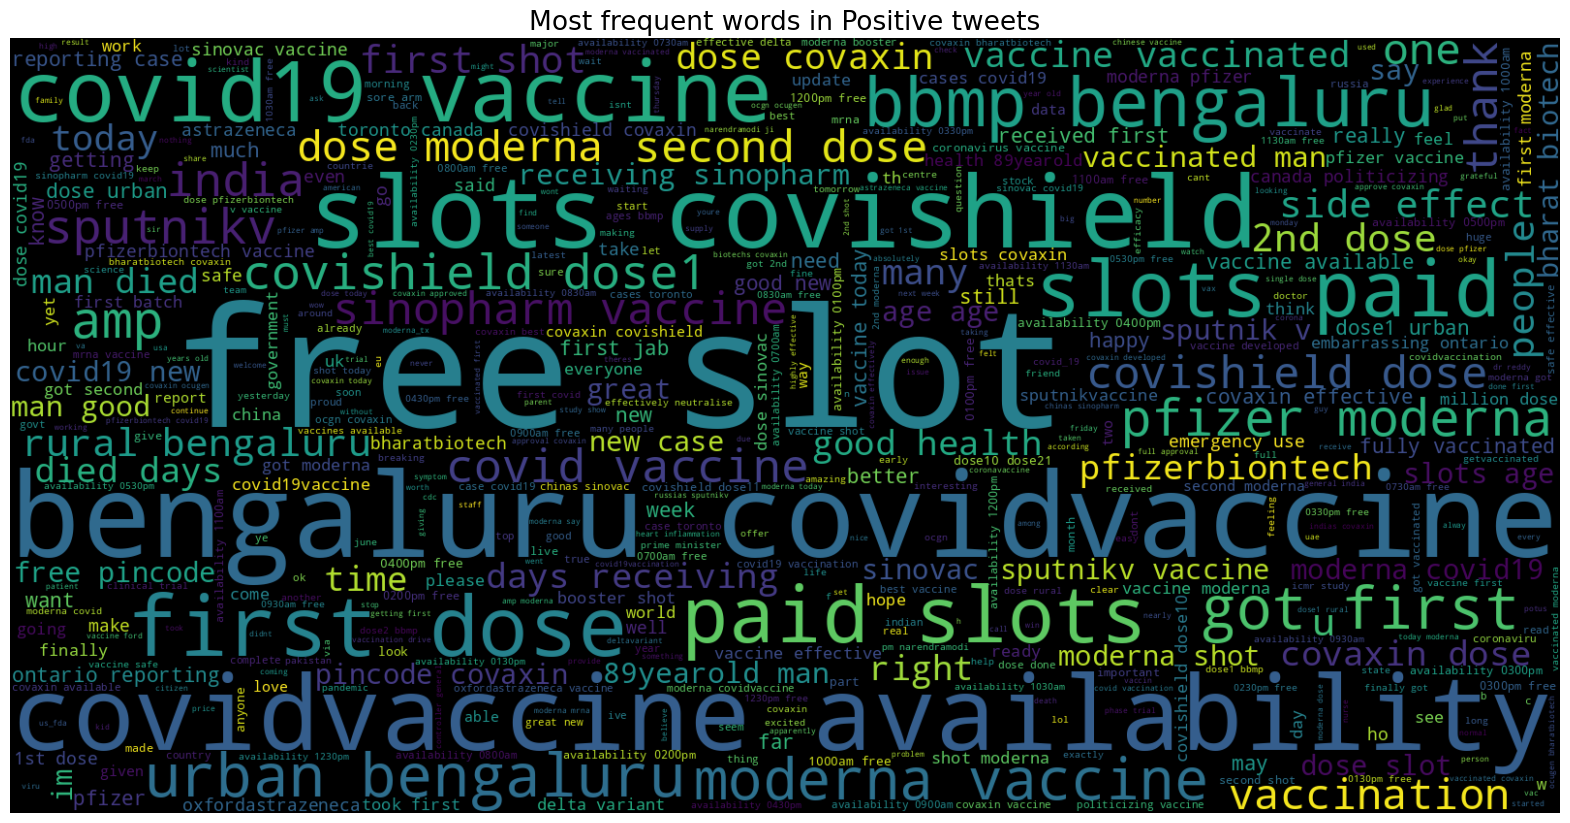

In [ ]:
pos_tweets = text_dt[text_dt['sentiment']=='POSITIVE']
pos_tweets = pos_tweets.sort_values(['polarity'],ascending=False)
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor="None")
wordcloud = WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Positive tweets',fontsize=19)
plt.show()

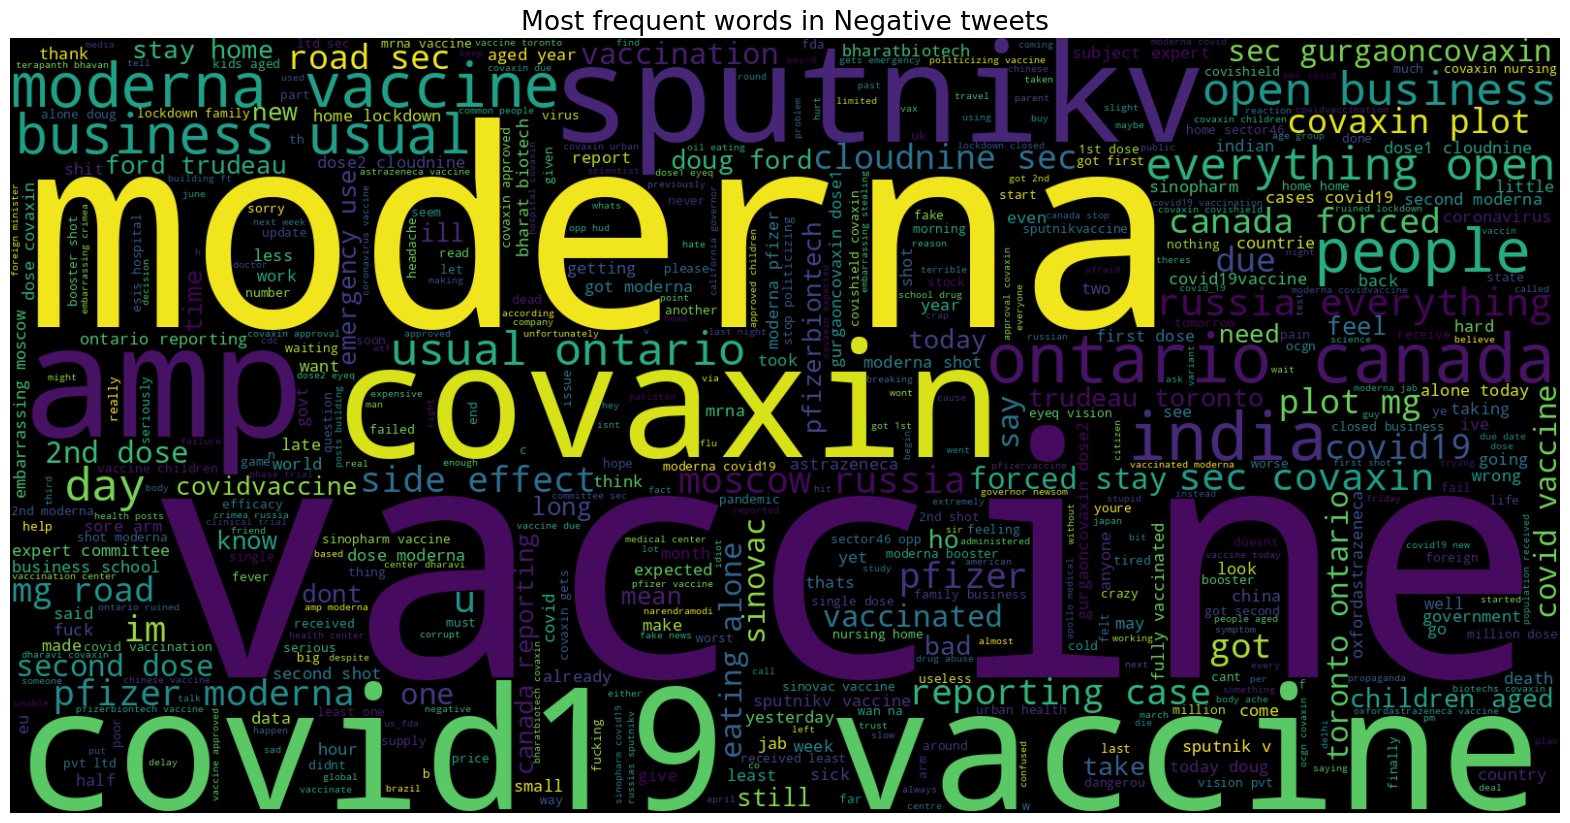

In [ ]:
neg_tweets = text_dt[text_dt['sentiment']=='NEGATIVE']
neg_tweets = neg_tweets.sort_values(['polarity'],ascending=False)
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor="None")
wordcloud = WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Negative tweets',fontsize=19)
plt.show()

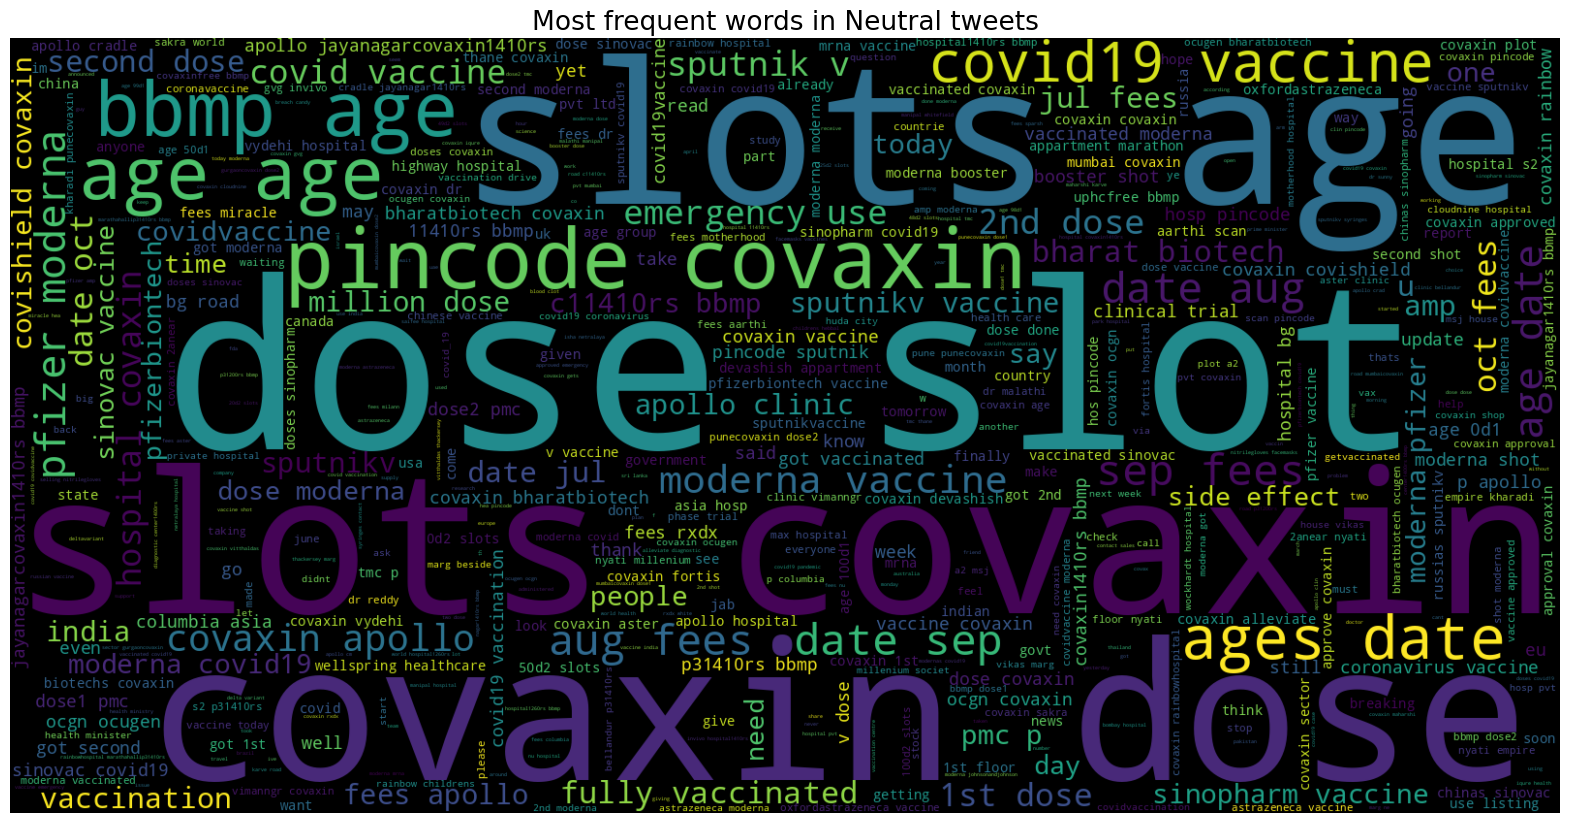

In [ ]:
neu_tweets = text_dt[text_dt['sentiment']=='NEUTRAL']
neu_tweets = neu_tweets.sort_values(['polarity'],ascending=False)
text = ' '.join([word for word in neu_tweets['text']])
plt.figure(figsize=(20,15), facecolor="None")
wordcloud = WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Neutral tweets',fontsize=19)
plt.show()

In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_dt['text'])

In [ ]:
x = text_dt["text"]
y = text_dt["sentiment"]
x = vect.transform(x)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
l_reg = LogisticRegression()
l_reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = l_reg.predict(x_test)

In [ ]:
accr = accuracy_score(y_pred,y_test)
print("Accuracy is: ",accr*100)

Accuracy is:  97.06629858463695


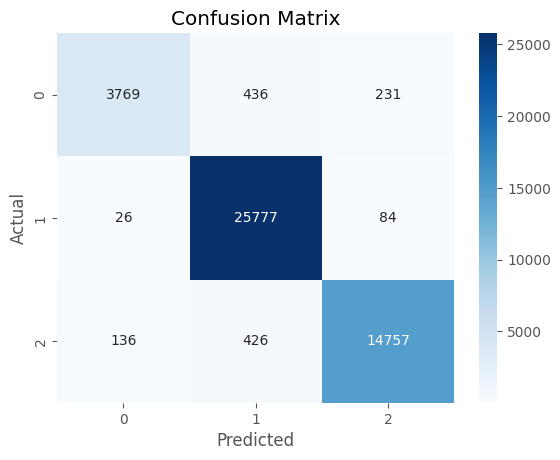

In [ ]:
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
cr = classification_report(y_pred,y_test)
print("Classification Report is: \n",cr)

Classification Report is: 
               precision    recall  f1-score   support

    NEGATIVE       0.85      0.96      0.90      3931
     NEUTRAL       1.00      0.97      0.98     26639
    POSITIVE       0.96      0.98      0.97     15072

    accuracy                           0.97     45642
   macro avg       0.94      0.97      0.95     45642
weighted avg       0.97      0.97      0.97     45642



In [ ]:
text = input("Enter your Review: ")
text_pp = data_preprocessing(text)
text_stem = stemming(text_pp)
pol_text = polarity(text_stem)
resultant_sentiment = sentiment(pol_text)
print("REVIEW ENTERED: \n",text)
print("Sentiment is: ",resultant_sentiment)

Enter your Review: thank you
REVIEW ENTERED: 
 thank you
Sentiment is:  NEUTRAL


In [ ]:
text = input("Enter your Review: ")
text_pp = data_preprocessing(text)
text_stem = stemming(text_pp)
pol_text = polarity(text_stem)
resultant_sentiment = sentiment(pol_text)
print("REVIEW ENTERED: \n",text)
print("Sentiment is: ",resultant_sentiment)

Enter your Review: very good
REVIEW ENTERED: 
 very good
Sentiment is:  POSITIVE
